# Setup

In [1]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('seaborn')

# Utilities

In [2]:
def print_graph_information (graph: nx.Graph):
    print(f'N = {graph.number_of_nodes()}')
    
    cum_sum = 0
    for _, degree in graph.degree():
        cum_sum += degree
        
    print(f'<k> = {cum_sum / graph.number_of_nodes()}')
    
def plot_degree_distribution (graph: nx.Graph, title: str): 
    degree_distribution = {}
    for _, degree in graph.degree():
        if degree in degree_distribution.keys():
            degree_distribution[degree] += 1
        else:
            degree_distribution[degree] = 1
            
    pairs = [(key, value) for key, value in degree_distribution.items()]
    pairs.sort(key=itemgetter(0))
    
    X = [pair[0] for pair in pairs]
    y = [pair[1] for pair in pairs]
            
    plt.figure(figsize=(7, 4))
    plt.bar(X, y)
    plt.xlim(0, 25)
    
    plt.title(title)
    plt.xlabel('Degree, k')
    plt.ylabel('Number of Nodes, n')
    
    plt.show()

# Results
## ER Model

In [3]:
er_graph = nx.erdos_renyi_graph(n=10000, p=0.001)

In [4]:
print_graph_information(er_graph)

N = 10000
<k> = 9.9862


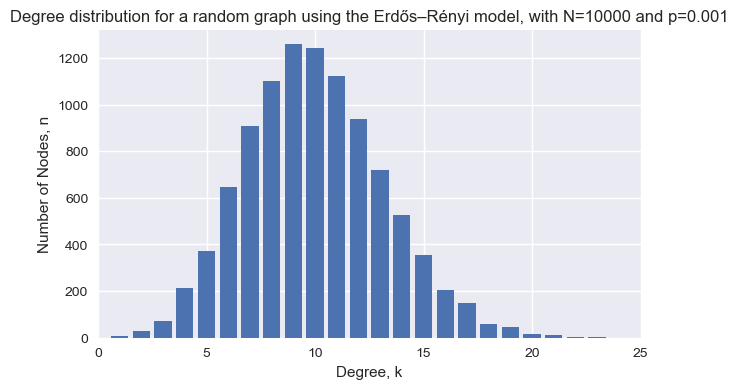

In [5]:
plot_degree_distribution(er_graph, title='Degree distribution for a random graph using the Erdős–Rényi model, with N=10000 and p=0.001')

## BA Model

In [6]:
ba_graph = nx.barabasi_albert_graph(n=10000, m=5)

In [7]:
print_graph_information(ba_graph)

N = 10000
<k> = 9.995


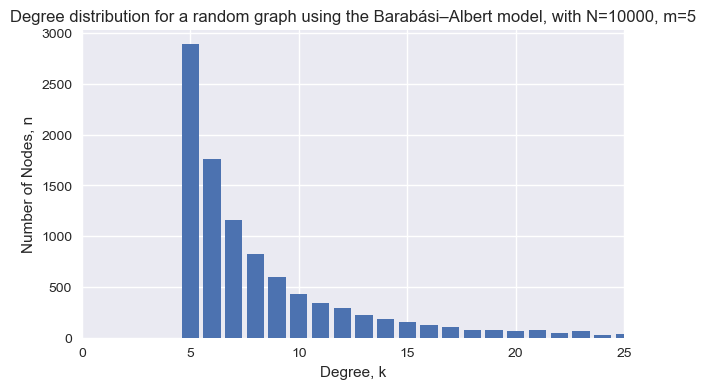

In [8]:
plot_degree_distribution(ba_graph, title='Degree distribution for a random graph using the Barabási–Albert model, with N=10000, m=5')